## Estadística descriptiva e inferencial
La estadística descriptiva es el conjunto de métodos estadísticos que describen y/o caracterizan un grupo de datos. La estadística inferencial busca deducir y sacar conclusiones acerca de situaciones generales mas allá del conjunto de datos obtenidos.

* Para calcular la media solo tienes que sumar todos los datos y dividirlos por la cantidad de datos que tengas.
* Para la mediana, ordena los datos de menor a mayor o viceversa y elige justo el número que se encuentre en la mitad de todos.
* Para la moda, descubre el dato que más se repite.

In [3]:
# Import numpy with alias np
import numpy as np
import pandas as pd

food_consumption = pd.read_csv('food_consumption.csv')
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


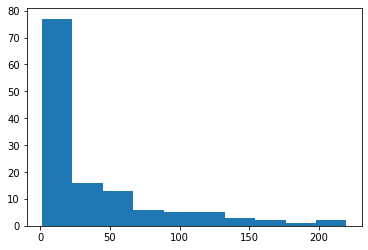

In [4]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

## El histograma presenta un sesgo hacia la derecha por que la cola esta dirigida a ese lado
Right Skewed (Positive Skewness)

<img src="Imagenes\pearson-mode-skewness.jpg">


In [7]:
print (rice_consumption.agg([np.mean, np.median]))

        Unnamed: 0  consumption  co2_emission
mean         718.5    29.375154     37.591615
median       718.5    11.875000     15.200000


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21112\1962252164.py:1: FutureWarning: ['country', 'food_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print (rice_consumption.agg([np.mean, np.median]))


In [8]:
# Calculo de cuartiles para la emision de co2_emission
print (np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


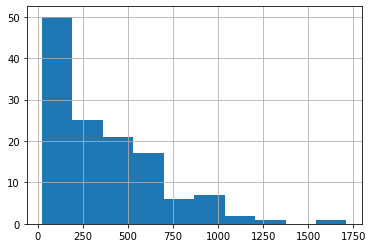

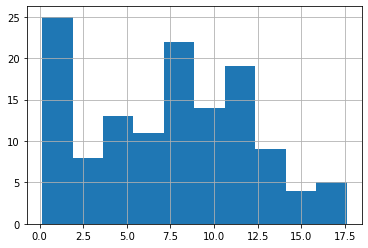

In [9]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

## Rango Intercuartil (RQ)
El rango intercuartil o intercuartílico (RQ) es una medida de la dispersión estadística, más precisamente, la distancia entre el primer y tercer cuartil de una distribución. Se calcula con la fórmula: IQR = Q3 – Q1, y también se lo conoce como dispersión H o medio cincuenta.


In [21]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3-q1
print (iqr)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64
664.4925000000001


In [25]:
# Calculate the lower and upper cutoffs for outliers
lower = np.quantile(emissions_by_country, 0.25) - 1.5*iqr
upper = np.quantile(emissions_by_country, 0.75) + 1.5*iqr
print (lower,upper)
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)
outliers_2 = emissions_by_country[(emissions_by_country < q1) | (emissions_by_country > q3)]
print ('----------------', q1 , q3)
print (outliers_2)

-550.0787500000001 2107.89125
country
Argentina    2172.4
Name: co2_emission, dtype: float64
---------------- 446.66 1111.1525000000001
country
Albania           1777.85
Angola             412.99
Argentina         2172.40
Australia         1938.66
Austria           1211.16
                   ...   
Uganda             304.72
United Kingdom    1241.63
Uruguay           1634.91
Zambia             225.30
Zimbabwe           350.33
Name: co2_emission, Length: 66, dtype: float64
